<span style="color:green">**Поздравляю, твой проект принят!**</span>

Андрей, отличная работа, получился качественный аналитический отчет. Поставленные задачи были успешно выполнены! Спасибо за обозначение корректировок. Недочёты исправлены! Надеюсь, ревью было полезным:) Желаю успехов в учебе и следующих проектах!

Актуальные комментарии имеют метку `v3`.

# Описание проекта "Контекст"

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
В процессе проекта мне предстоит:
1. Загрузить и предобработать данные;
2. Приоритизировать гипотезы;
3. Запустить A/B-тест;
4. Проанализируйте результаты и принять решение.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import sqrt
import datetime as dt
import scipy.stats as stats

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Правильно, что импортируешь необходимые библиотеки в первой ячейке. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет настроить свое окружение при необходимости.
</div>

## Приоритизация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [2]:
try:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
# меняем столбцы на нижний регистр
hypothesis.columns = hypothesis.columns.str.lower()
# меняем количество обображаемых символов в столбцах до 160
pd.set_option('display.max_colwidth', 160)

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Молодец, что изменяешь параметры отображения таблиц для вывода всей информации👍
</div>

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
hypothesis['ICE'] = ((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']).round(3)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Рекомендую производить округление до 3 знаков после запятой.
</div>

<div class="alert alert-block alert-info">
<b>Сделано👌</b>
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**

Так лучше👍
</div>

Наиболее приоритетными гипотезами согласно ICE SCORE являются:
- Запустить акцию, дающую скидку на товар в день рождения;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE',ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее приоритетными гипотезами согласно RICE SCORE являются:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

В отличии от ICE у фреймворка RICE есть дополнительный параметр reach, который и повлиял на различия в приоретизации гипотез. Топ возглавили гипотезы, у которых высокие значения параметра reach.

### Вывод

В процессе определения приоретизации гипотез были проделаны следующие действия:
* Загрузили и проверили данные из файла hypothesis;
* Привели названия столбцов к нижнему регистр;
* Изменили количество отображаемых символов в столбцах до 160;
* Применили фреймворк ICE для приоритизации гипотез. Наиболее приоритетными гипотезами согласно ICE SCORE оказались:
  - Запустить акцию, дающую скидку на товар в день рождения;
  - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
  - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
* Применили фреймворк RICE для приоритизации гипотез. Наиболее приоритетными гипотезами согласно RICE SCORE оказались:
  - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
  - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
  - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
* Выявили, что у фреймворка RICE есть дополнительный параметр reach, который значительно влияет на различия в приоретизации гипотез.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Все верно, охват меняет приоритезацию. Отличие фреймворков определено.
</div>

## Анализ A/B-теста

### Загрузка и подготовка данных

In [7]:
try:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')

In [8]:
try:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
# изменим столбцы date на формат datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Даты приведены к соответствующему типу👍
</div>

In [14]:
#проверяем на явные дубликаты
orders = orders.drop_duplicates()
visitors = visitors.drop_duplicates()

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Проверь, есть ли в таблице orders пользователи, оказавшиеся одновременно в двух группах. Дело в том, что при АВ тестировании могут быть ошибки при логировании и распределении пользователей по группам.
</div>

<div class="alert alert-block alert-info">
<b>Вроде получилось. По моим расчетам нашлось 166 совпадений. Алгоритм: сделал датафрейм visitorsGroups с уникальными парами ['visitorId', 'group'], затем сделал срез по повторяющимся значениям в столбце visitorId </b>
</div>

In [15]:
visitorsGroups = orders[['visitorId', 'group']].drop_duplicates()
visitorsGroups.head()

,visitorId,group
0,3312258926,B
1,3642806036,B
2,4069496402,A
3,1196621759,B
4,2322279887,B


In [16]:
AB_duplicates = orders[orders.duplicated('visitorId')]['visitorId']
AB_duplicates

41       237748145
91      2742574263
95       457167155
98      2706377257
112     3062433592
           ...    
1182    1668030113
1183     963407295
1184    2949041841
1189     393266494
1195    1614305549
Name: visitorId, Length: 166, dtype: int64

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера v2 (недочет, который нужно доработать)**
    
Проверка выполнена некорректно, пользователи в рамках одной группы могут иметь несколько заказов. По замыслу АВ теста у каждого пользователя должна быть только одна уникальная группа. Проверь, есть ли пользователи, для которых это условие не выполняется. Оцени долю таких пользователей и прими решение по пересечениям.
</div>

<div class="alert alert-block alert-info">
<b>Теперь вроде понял и посчитал. Доля повторяющихся пользователей от общего количества составляет почти 6%. Для чистоты AB-теста принимаю решение удалить данных пользователей из анализа. Интересно как это отобразится на финальном результате. Обновленные выводы будут с этим знаком 🔁. Старые удалять не буду на случай, если придется откатить обратно. </b>
</div>

In [17]:
# всего пользователей
orders['visitorId'].nunique()

1031

In [18]:
# количество повторяющихся пользователей в обеих группах
groupA_visitors = orders[orders['group']=='A']['visitorId']
groupB_visitors = orders[orders['group']=='B']['visitorId']
AB_visitors = orders.query('visitorId in @groupA_visitors and visitorId in @groupB_visitors')
AB_visitors['visitorId'].nunique()

58

In [19]:
#доля повторяющихся пользователей от общего количества
AB_visitors['visitorId'].nunique()/orders['visitorId'].nunique()

0.05625606207565471

In [20]:
#принимаю решение удалить из orders повторяющихся в обеих группах пользователей
orders = orders.query('visitorId not in @AB_visitors["visitorId"]')

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Допустимое решение их удалить, но тогда эти пользователи останутся в таблице `visitors`, которую сложно предобработать от таких ошибок. 
    
Если принято решение оставить, то нужно указать в выводе, что анализ далее прошел с учётом того, что небольшая доля пользователей участвовала в двух группах. 
    
В любом случае важно не оставлять факт пересечения групп без внимания. Если пользователи попали в обе группы, то коллегам нужно знать, что есть ошибки в распределении. Эта информация в реальной работе поможет коллегам разобраться в проблеме и устранить ошибку распределения для следующих тестов.
</div>

In [21]:
#Создаем датафрейм datesGroups с уникальными парами значений 'date' и 'group' таблицы orders. Избавляемся от дубликатов методом drop_duplicates()
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


**Объявляем переменную ordersAggregated, содержащую:** 
- дату;
- группу A/B-теста;
- число уникальных заказов в группе теста по указанную дату включительно;
- число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
- суммарную выручку заказов в группе теста по указанную дату включительно.


In [22]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <=x['date'], orders['group'] == x['group'])].agg({'date':'max', 'group':'max','transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}),axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


**Объявляем переменную visitorsAggregated, содержащую:**
- дату;
- группу A/B-теста;
- количество уникальных посетителей в группе теста по указанную дату включительно

In [23]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


**Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge(). Присвоим столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']**

In [24]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
5,2019-08-03,B,54,53,288850,1803
6,2019-08-04,A,77,71,388030,2562
7,2019-08-04,B,68,66,385740,2573
8,2019-08-05,A,99,92,474413,3318
9,2019-08-05,B,89,87,475648,3280


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Кумулятивные данные собраны👍
</div>

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

**Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B**

In [25]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


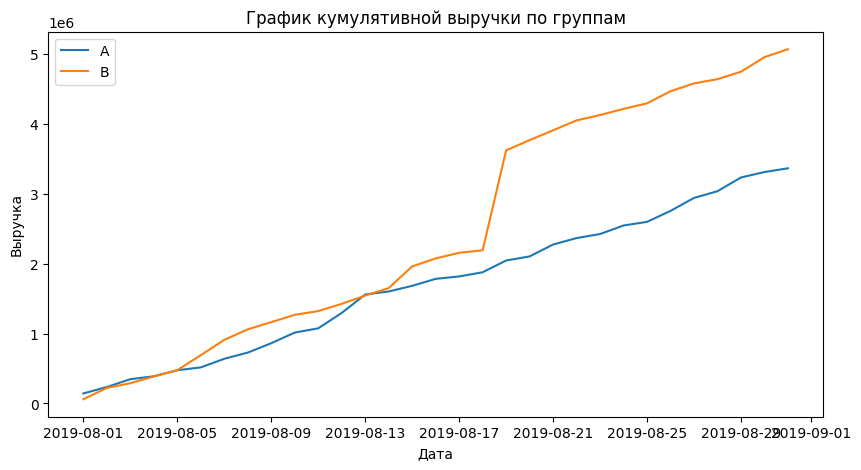

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Визуализация на хорошем уровне. Здорово, что уделяешь внимание оформлению графиков. 
    
Предлагаю изучить интересные методы по визуализации. Прикрепляю несколько интересных ссылок:
    
https://coderlessons.com/tutorials/python-technologies/izuchai-siborna/siborn-kratkoe-rukovodstvo

https://tproger.ru/translations/python-data-vizualization/
</div>

График кумулятивной выручки отчетливо показывает, что примерно в середине теста, выручка группы B явно выше выручки группы A. Требуется проверка на аномалии.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Все верно! Резкий рост обнаружен, должно быть имеем дело с выбросами.
</div>

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

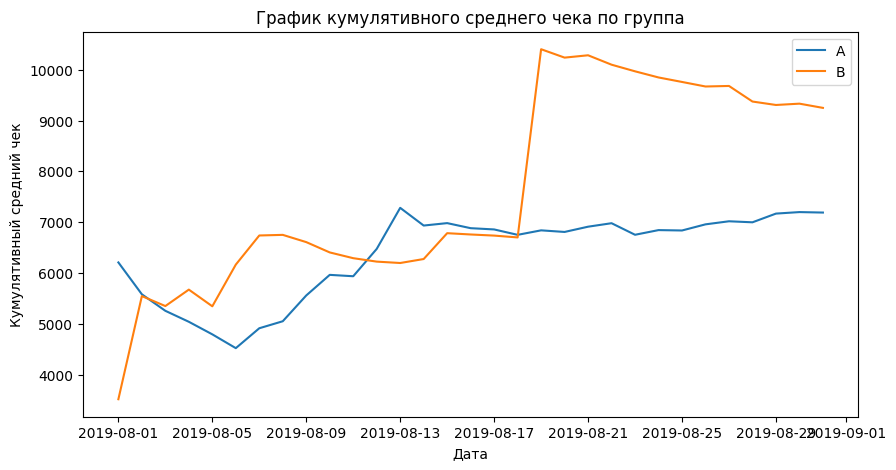

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группа')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend()
plt.show()

График кумулятивного среднего чека по группам показывает резкий всплеск среднего чека группы B в середине теста, что подтверждает необходимость проверки на аномально большие покупки.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Согласен. 
</div>

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

**Объединим таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() так, чтобы она содержала столбцы: ['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB']. Сохраним в переменной mergedCumulativeRevenue.**

In [28]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


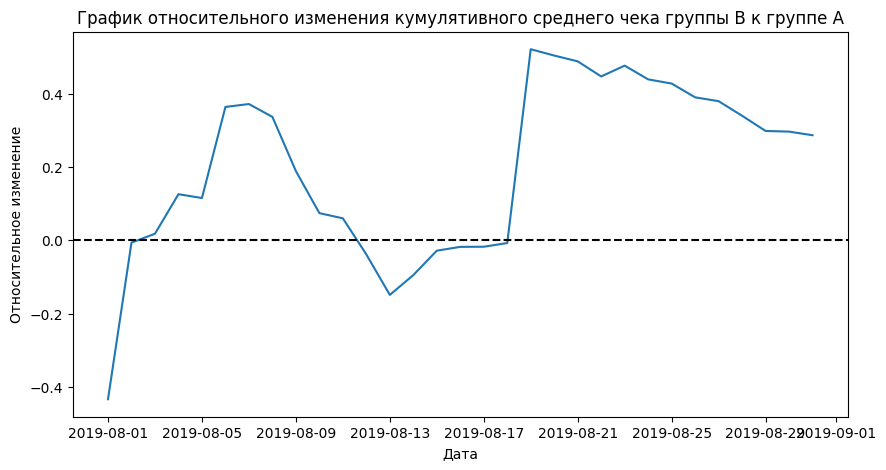

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.legend
plt.show()

На графике относительного изменения кумулятивного среднего чека мы видим резкие скачки на нескольких этапах теста. Скорее всего в эти даты были сделаны крупные покупки в группе B.

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Второй пик 19 августа можно объяснить ранее обнаруженными аномалиями. Но чем можно объяснить первый пик с учётом того, что в эти даты аномалий по среднему чеку и по выручке не было?
</div>

In [30]:
avg_revenue = ordersAggregated
avg_revenue['avg_revenue'] = avg_revenue['revenue']/avg_revenue['transactionId']
avg_revenue[['date', 'group', 'transactionId', 'revenue', 'avg_revenue']].head(22)


,date,group,transactionId,revenue,avg_revenue
55,2019-08-01,A,23,142779,6207.782609
66,2019-08-01,B,17,59758,3515.176471
175,2019-08-02,A,42,234381,5580.500000
173,2019-08-02,B,40,221801,5545.025000
291,2019-08-03,A,66,346854,5255.363636
383,2019-08-03,B,54,288850,5349.074074
499,2019-08-04,A,77,388030,5039.350649
498,2019-08-04,B,68,385740,5672.647059
719,2019-08-05,A,99,474413,4792.050505
699,2019-08-05,B,89,475648,5344.359551


<div class="alert alert-block alert-info">
<b>Как показывают данные, с 2  по 9 августа средний чек группы B с каждым днем стремительно возрастал. Это кумулятивно и отобразилось на графике. </b>
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Верно, при этом группа А показывала снижение.
</div>

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

**Добавим в cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.
Объявим переменные cumulativeDataA и cumulativeDataB, в которых сохраните данные о заказах в сегментах A и B соответственно.**

In [31]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [32]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772


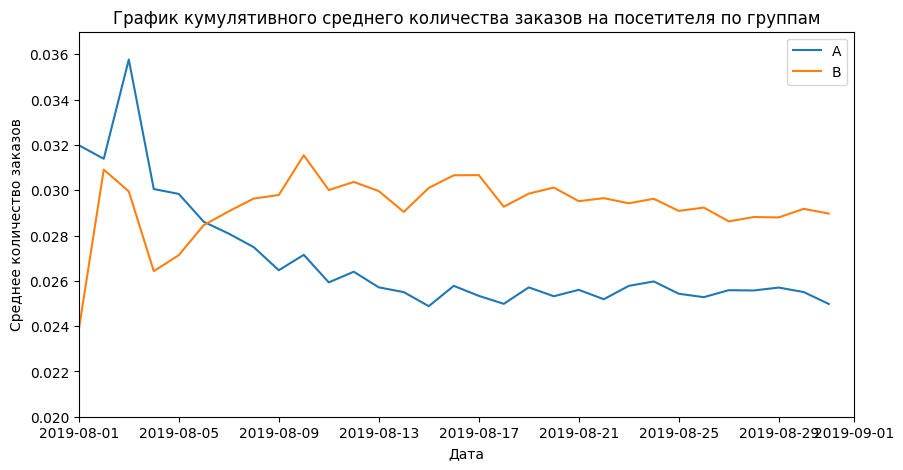

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.020, 0.037])
plt.legend()
plt.show()

По графику кумулятивного среднего количества заказов видно, что изначально конверсия заказов группы A была выше конверсии группы B. Примерно с шестого дня группа B вырвалась вперед и лидировала до конца теста.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Согласен, к середине теста графики стабилизировались около определенных значений.
</div>

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

**Объединим таблицы cumulativeDataA и cumulativeDataB методом merge() так, чтобы она содержала столбцы: ['date', 'conversionA', 'conversionB']. Сохраним в переменной mergedCumulativeConversions.**

In [34]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


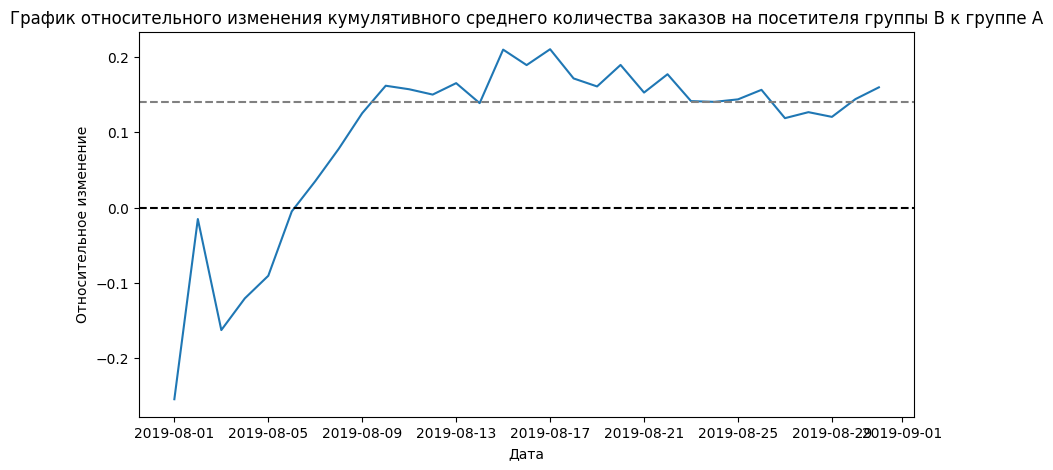

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.show()

График относительного изменения кумулятивного среднего количества заказов демонстрирует, что после первой недели теста группа B вырвалась в лидеры по данной метрике и в конце теста зафиксировала прирост на 14% относительно группы A.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
     
Группа В лучше группы А большую часть теста. Правильно, что сразу комментируешь графики.
</div>

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

**Найдем число заказов по пользователям. Назовем его ordersByUsers. Отсортируем по убыванию количества заказов пользователей.**

In [36]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [37]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsers.columns = ['visitors', 'transactions']
ordersByUsers.sort_values(by='transactions', ascending=False).head()

,visitors,transactions
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


**Построим диаграмму методом scatter().** 

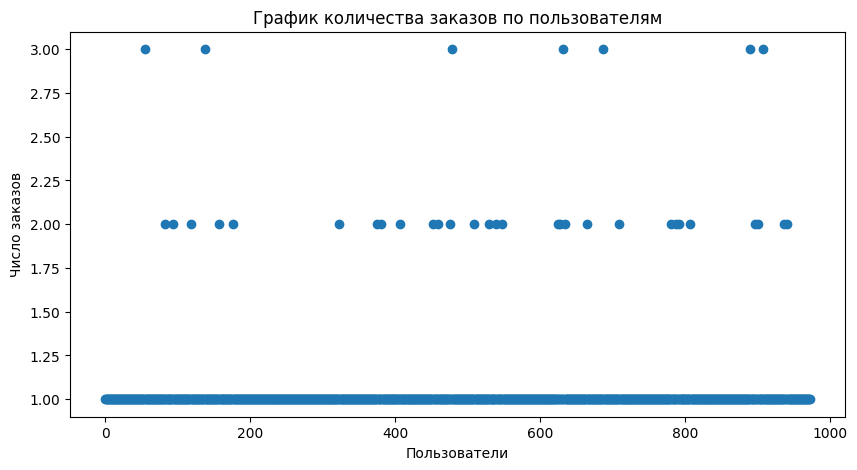

In [38]:
plt.figure(figsize=(10, 5))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactions'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Число заказов')
plt.show()

Большая часть - пользователи, совершившие 1-2 покупки. Пользователи с 3 и более заказами возможно аномальные.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [39]:
np.percentile(ordersByUsers['transactions'], [95, 99])

array([1., 2.])

Не более 5% пользователей сделали больше 2 заказов, 1% пользователей сделали больше 4 заказов.

🔁Не более 5% пользователей сделали больше 1 заказов, 1% пользователей сделали больше 2 заказов

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
     
Отлично, перцентили количества заказов на пользователя рассчитаны верно. 
</div>

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

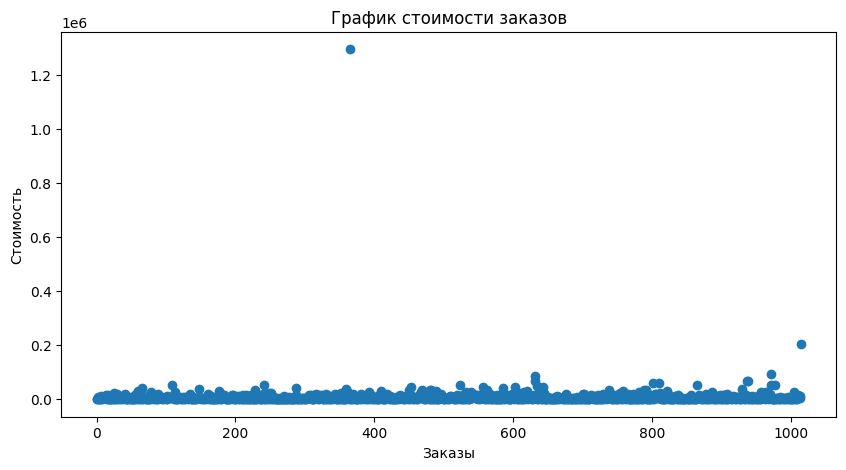

In [40]:
plt.figure(figsize=(10, 5))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.show()

На графике из общей массы выбиваются 2 заказа - на 200K р. и >1200K р. Выглядят аномально.

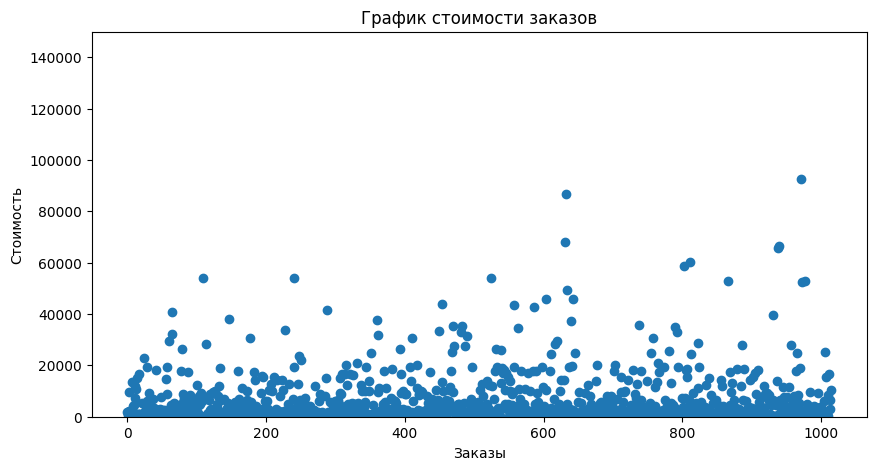

In [41]:
plt.figure(figsize=(10, 5))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.ylim([0,150000])
plt.show()

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Можно увеличить масштаб графика, не учитывая аномально большие значения:
    
    plt.ylim([0,150000])
</div>

<div class="alert alert-block alert-info">
<b>Построил дополнительный график с урезанным масштабом👌</b>
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**

Так лучше👍
</div>

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [42]:
np.percentile(orders['revenue'], [95,99])

array([26785., 53904.])

Не больше 5% сделали заказ дороже 28К. Не больше 1% сделали заказ дороже 58,2К рублей.

🔁Не больше 5% сделали заказ дороже 26.7К. Не больше 1% сделали заказ дороже 53,9К рублей.

<div class="alert alert-block alert-success">
    
**Комментарий ревьювера (все отлично)**
     
Отлично, перцентили величины заказов рассчитаны верно.
</div>

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

**Подготовим данные (код взял из теории, поменяв названия столбцов)**

In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

**Создаем переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов.**

In [44]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [45]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders'] 

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

**Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.**

In [46]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [47]:
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

**Обозначим гипотезы**

* H0: Среднее количество заказов на посетителя у групп A и B равны. Статистически значимых отличий не имеется;
* H1: Среднем количество заказов на посетителя у групп A и B различны. Статистически значимые отличия имеются.
* Уровень статистической значимости: 0.05

**Выведем p-value для сравнения среднего между группами с помощью теста Манна-Уитни.**

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Сформулируй гипотезы перед проверками.

</div>

<div class="alert alert-block alert-info">
<b>Сделано👌</b>
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**

Гипотезы верно сформулированы👍
</div>

In [48]:
"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])

'0.01102'

p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы можем отвергнуть.

**Вычислим и выведем относительное различие в среднем между группами.**

In [49]:
"{0:.5f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1)

'0.15980'

Относительное различие также показывает увеличение среднего группы B на 13.8%

🔁Относительное различие также показывает увеличение среднего группы B на 15.9%

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Согласен. Группа B лучше по результатам.
</div>

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера v2 (недочет, который нужно доработать)**
    
Для проверки гипотез по среднему чеку тоже нужно сформулировать гипотезы.

</div>

* H0: Статистически значимых отличий в среднем чеке между группами A и B не имеется;
* H1: Статистически значимые отличия в среднем чеке между группами A и B имеются;
* Уровень статистической значимости: 0.05

<div class="alert alert-block alert-info">
<b>Сделано👌</b>
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Принято👌
</div>

In [50]:
'{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

'0.82949'

p-value больше 0.05. Это означает, что статистически значимых отличий в среднем чеке между группами нет.

In [51]:
'{0:.5f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.28660'

При этом относительное различие между средними чеками составляет 25.8% в пользу группы B. Необходимо избавиться от аномалий и сделать анализ по очищенным данным.

🔁При этом относительное различие между средними чеками составляет 28.6% в пользу группы B. Необходимо избавиться от аномалий и сделать анализ по очищенным данным.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Ты верно сделал вывод, что статистически значимых различий в среднем чеке нет.
</div>

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

<div class="alert alert-block alert-info">
<b>Переделал условия аномальных пользователей - вместо 4 и более взял 3 и более</b>
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Молодец, что проверил решение после удаления пересечений👌
</div>

🔁**Примем за аномальных пользователей тех, кто сделал 3 и более заказа, либо сделал заказ на сумму свыше 30000 р.**

In [52]:
print('95-й и 99-й перцентили средних чеков:', int(np.percentile(orders['revenue'], [95])),';', int(np.percentile(orders['revenue'], [99]))) 

95-й и 99-й перцентили средних чеков: 26785 ; 53904


In [53]:
print('95-й и 99-й перцентили числа заказов на одного пользователя:', int(np.percentile(ordersByUsers['transactions'], [95])),';',int(np.percentile(ordersByUsers['transactions'], [99])))

95-й и 99-й перцентили числа заказов на одного пользователя: 1 ; 2


**Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию.**

In [54]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= 3]['userId'],
    ],
    axis=0,
)

In [55]:
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Стоит исключить ручной ввод данных, такой код неустойчив к изменениям исходных данных. Вместо этого лучше использовать перцентили:
    
    int(np.percentile(orders['revenue'], [95])) 
</div>

<div class="alert alert-block alert-info">
<b>Сделано👌</b>
</div>

In [56]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [57]:
ordersByUsersA.head()

,userId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Для оценки потерь данных рекомендуется посчитать аномальных пользователей.
</div>


In [58]:
abnormalUsers.count()

49

<div class="alert alert-block alert-info">
<b>Сделано👌</b>
</div>

**Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраните очищенные данные о заказах — не включая аномальных пользователей.**

In [59]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [60]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [61]:
'{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

'0.00971'

In [62]:
'{0:.5f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.18726'

p-value 0.01832 также меньше 0.05, означая, что статистическая значимость достигнута. По очищенным данным показатели среднего количества заказов в группе B лучше на 14.7%

🔁p-value 0.00971 также меньше 0.05, означая, что статистическая значимость достигнута. По очищенным данным показатели среднего количества заказов в группе B лучше на 18.7%

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
p-value в выводе не соответствует p-value в коде.
</div>


<div class="alert alert-block alert-info">
<b>Подправил. Странно. Видимо делал корректировки, а потом не исправил значения в тексте после финального прогона кода.  </b>
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
👌
</div>

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [63]:
'{0:.5f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1])

'0.74088'

In [64]:
"{0:.5f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )

'-0.02657'

P-value поменялось не значительно: с 0.72929 до 0.95832, а вот относительное различие практически ликвидировалось после удаления аномальных значений. В данных стало меньше шума.

🔁P-value поменялось не значительно: с 0.82949 до 0.74088, а вот относительное различие практически ликвидировалось после удаления аномальных значений. В данных стало меньше шума.

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Здесь тоже p-value в выводе не соответствует p-value в коде.
</div>


<div class="alert alert-block alert-info">
<b>Подправил</b>
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
👌
</div>

### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Основываясь на проведенный анализ с помощью графиков, мы выявили следующие факты:**
* График кумулятивной выручки отчетливо показывает, что примерно в середине теста, выручка группы B явно выше выручки группы A.
* График кумулятивного среднего чека по группам показывает резкий всплеск среднего чека группы B в середине теста.
* На графике относительного изменения кумулятивного среднего чека мы увидели резкие скачки на нескольких этапах теста. Сделаны предположеня, что в эти даты были сделаны крупные покупки в группе B.
* По графику кумулятивного среднего количества заказов видно, что изначально конверсия заказов группы A была выше конверсии группы B. Примерно с шестого дня группа B вырвалась вперед и лидировала до конца теста.
* График относительного изменения кумулятивного среднего количества заказов демонстрирует, что после первой недели теста группа B вырвалась в лидеры по данной метрике и в конце теста зафиксировала прирост на 14% относительно группы A.

**Проведенный следом анализ на предмет аномальных значений дал следующие результаты:**
* Точечный график количества заказов по пользователям показал, что большая часть - пользователи, совершившие 1-2 покупки. Пользователи с 3 и более заказами возможно аномальные. 
* 95-ый и 99-ый перцентели указали: не более 5% пользователей сделали больше 2 заказов, 1% пользователей сделали больше 4 заказов.
* Точечный график стоимостей заказов продемонстрировал, что из общей массы выбиваются 2 заказа - на 200K р. и >1200K р., что выглядит аномально.
* 95-ый и 99-ый перцентели указали: не больше 5% сделали заказ дороже 28К рублей. Не больше 1% сделали заказ дороже 58,2К рублей.

**На основании полученных результатов за аномальных пользователей были приняты те, кто сделал 4 и более заказа, либо сделал заказ на сумму свыше 30000 р.**

**Анализ статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» и «очищенным» данным позволил сделать следующие выводы:**
* Имеются статистически значимые различия в среднем числе заказов между группами.
* Относительный прирост вырос с 13.8% до 14.7% в пользу группы B до и после очистки данных.

**Анализ статистической значимости различий в среднем чеке заказа между группами по «сырым» и «очищенным» данным указал на следующие факты:**
* Статистически значимых отличий в среднем чеке между группами нет.
* После очистки данных от аномальных значений относительное различие между средними чеками нивелировалось.

Исходя из вышеперечисленных исследований, принимаем решение: **Остановить тест, зафиксировать победу группы B**


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
1) Согласен с решением. Тест прошел успешно! Среднее количество заказов увеличилось при отсутствии значимых изменений по среднему чеку -> выручка увеличилась, так как стали покупать чаще.
    
2) Основные результаты отражены. Хороший итоговый вывод👍
</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (общий вывод)**
    
Андрей, мне понравилась твоя работа! Выводы хорошо структурированы и достаточно содержательны, умеешь считать перцентили, собирать и визуализировать данные, есть навыки проверки гипотез. Спасибо за четкие комментарии по результатам исследования, аккуратный код и качественное оформление отчета! Это упростило проверку. Для принятия твоей работы нужно исправить критические недочёты:
    
* написать введение;    
* проверить данные на пересечение групп;
* сформулируй гипотезы перед проверками.
    
Также обрати внимание, что значения p-value в выводе не соотносятся с результатами в коде.
    
В дополнении прикрепляю полезные материал по теме A/B-тестирования: 

* https://your-scorpion.ru/ab-tests-check-mathematics/
    
Жду твою работу!
  
</div>

<div class="alert alert-block alert-info">
<b>Василий, благодарю за проверку проекта и ценные советы. Все замечания учтены и исправлены👌</b>
</div>

<div class="alert alert-block alert-info">
<b>🔁 В целом удаление пользователей и изменение условия аномальных заказов не повлияли на результат ни в одном из последующих пунктов, а лишь слегка изменили показатели. Но данные стали чище, а AB-тест более корректным. Принятое решение осталось прежним.</b>
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Здорово, что проконтролировал результаты после изменения данных👍
</div>